In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [79]:
tabela = pd.read_excel('vendas_empresa.xlsx')
display(tabela)

,id_venda,data_venda,produto,categoria,quantidade,preco_unitario,desconto_%,regiao,canal_venda,vendedor,valor_total
0,1,2024-01-01,Monitor,Eletrônicos,2,3547.05,0,Centro-Oeste,Online,Daniela,7094.10
1,2,2024-01-02,Teclado,Eletrônicos,2,6436.66,10,Sul,Loja Física,Eduardo,11585.99
2,3,2024-01-03,Tablet,Acessórios,7,7825.42,10,Nordeste,Loja Física,Fernanda,49300.15
3,4,2024-01-04,Teclado,Eletrônicos,6,4492.44,20,Norte,Online,Eduardo,21563.71
4,5,2024-01-05,Teclado,Acessórios,3,2649.22,15,Sul,Loja Física,Carlos,6755.51
...,...,...,...,...,...,...,...,...,...,...,...
195,196,2024-07-14,Tablet,Eletrônicos,1,159.52,0,Sudeste,Online,Bruno,159.52
196,197,2024-07-15,Smartphone,Acessórios,9,1880.13,10,Sul,Loja Física,Fernanda,15229.05
197,198,2024-07-16,Monitor,Acessórios,8,2986.32,10,Centro-Oeste,Loja Física,Daniela,21501.50
198,199,2024-07-17,Tablet,Informática,1,3953.70,15,Centro-Oeste,Online,Fernanda,3360.64


In [80]:
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id_venda        200 non-null    int64         
 1   data_venda      200 non-null    datetime64[ns]
 2   produto         200 non-null    object        
 3   categoria       200 non-null    object        
 4   quantidade      200 non-null    int64         
 5   preco_unitario  200 non-null    float64       
 6   desconto_%      200 non-null    int64         
 7   regiao          200 non-null    object        
 8   canal_venda     200 non-null    object        
 9   vendedor        200 non-null    object        
 10  valor_total     200 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 17.3+ KB


In [81]:
tabela.shape

(200, 11)

In [82]:
print(tabela['produto'].unique())
print(tabela['categoria'].unique())
print(tabela['regiao'].unique())

['Monitor' 'Teclado' 'Tablet' 'Smartphone' 'Mouse' 'Notebook']
['Eletrônicos' 'Acessórios' 'Informática']
['Centro-Oeste' 'Sul' 'Nordeste' 'Norte' 'Sudeste']


In [83]:
receita_total =  tabela['valor_total'].sum()
print(f"Receita total: R$ {receita_total:,.2f}")

Receita total: R$ 3,512,635.36


In [84]:
tabela['ano_mes'] = tabela['data_venda'].dt.strftime('%y-%m')
receita_mensal = tabela.groupby('ano_mes')['valor_total'].sum().reset_index()
display(receita_mensal)

,ano_mes,valor_total
0,24-01,511286.02
1,24-02,493957.83
2,24-03,427224.08
3,24-04,627112.59
4,24-05,529451.80
5,24-06,533649.84
6,24-07,389953.20


In [85]:
receita_mensal['porcentual'] = ((receita_mensal['valor_total'] / receita_total) * 100) .map('{:.2f}%'.format)
display(receita_mensal)

,ano_mes,valor_total,porcentual
0,24-01,511286.02,14.56%
1,24-02,493957.83,14.06%
2,24-03,427224.08,12.16%
3,24-04,627112.59,17.85%
4,24-05,529451.80,15.07%
5,24-06,533649.84,15.19%
6,24-07,389953.20,11.10%


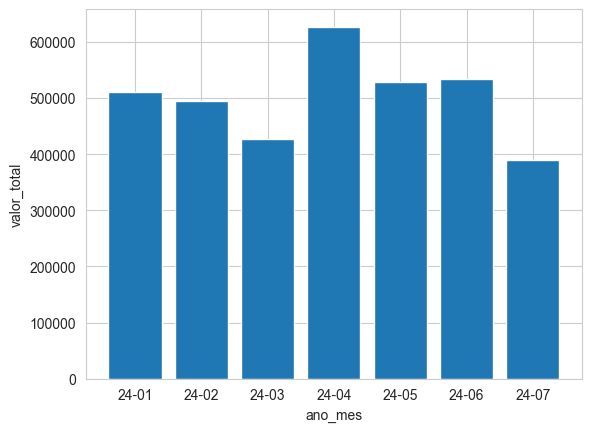

In [86]:
plt.bar(receita_mensal['ano_mes'], receita_mensal['valor_total'])
plt.xlabel('ano_mes')
plt.ylabel('valor_total')
plt.show()

In [87]:
produtos_totais = tabela['quantidade'].sum()
display(produtos_totais)


np.int64(970)

In [88]:
produtos_vendidos = tabela.groupby('produto')['quantidade'].sum().reset_index()

produtos_vendidos['porcentual'] = (produtos_vendidos['quantidade']/ produtos_totais) * 100
produtos_vendidos = produtos_vendidos.sort_values( by= 'porcentual' , ascending = False)
produtos_vendidos['porcentual'] = produtos_vendidos['porcentual'].map('{:.2f}%'.format)
display(produtos_vendidos)

,produto,quantidade,porcentual
0,Monitor,220,22.68%
2,Notebook,171,17.63%
4,Tablet,162,16.70%
5,Teclado,143,14.74%
1,Mouse,141,14.54%
3,Smartphone,133,13.71%


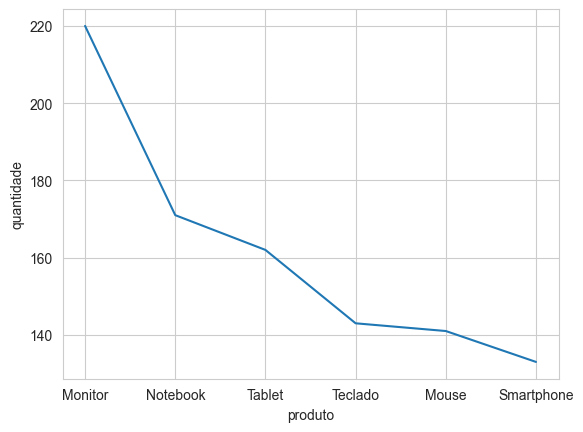

In [89]:
plt.plot(produtos_vendidos['produto'], produtos_vendidos['quantidade'])
plt.xlabel('produto')
plt.ylabel('quantidade')
plt.show()

In [90]:
# Agrupando e somando
produtos_faturamento = tabela.groupby('produto')['valor_total'].sum().reset_index()

# Calculando o percentual (mantendo em número por enquanto)
produtos_faturamento['porcentual'] = (produtos_faturamento['valor_total'] / receita_total) * 100

# Ordenando em ordem crescente pelo percentual
produtos_faturamento = produtos_faturamento.sort_values(by='porcentual', ascending=False)

# Formatando o percentual para exibir com duas casas e o símbolo %
produtos_faturamento['porcentual'] = produtos_faturamento['porcentual'].map('{:.2f}%'.format)

# Exibindo o resultado final
display(produtos_faturamento)


,produto,valor_total,porcentual
4,Tablet,693983.08,19.76%
1,Mouse,658074.50,18.73%
2,Notebook,638649.66,18.18%
0,Monitor,571683.44,16.28%
5,Teclado,536205.47,15.27%
3,Smartphone,414039.21,11.79%


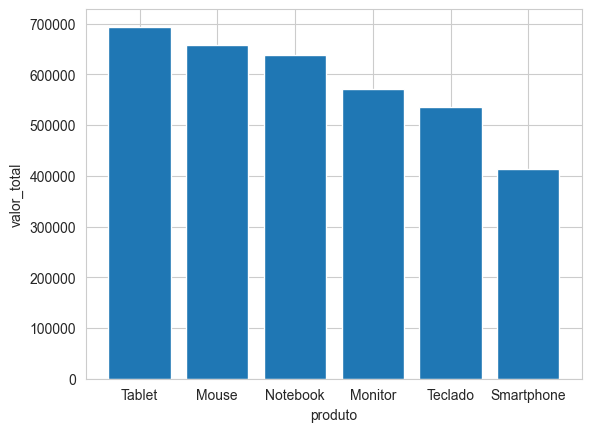

In [91]:
plt.bar(produtos_faturamento['produto'], produtos_faturamento['valor_total'])
plt.xlabel('produto')
plt.ylabel('valor_total')
plt.show()

In [92]:
vendas_categoria = tabela.groupby('categoria')['valor_total'].sum().reset_index()

vendas_categoria['porcentual'] = (vendas_categoria['valor_total']/ tabela['valor_total'].sum()) * 100

vendas_categoria = vendas_categoria.sort_values( by= 'porcentual' , ascending = False)

vendas_categoria['porcentual'] = vendas_categoria['porcentual'].map('{:.2f}%'.format)
display(vendas_categoria)

,categoria,valor_total,porcentual
1,Eletrônicos,1371738.94,39.05%
2,Informática,1076729.05,30.65%
0,Acessórios,1064167.37,30.30%


In [93]:
desconto_produto = tabela.groupby('produto')['desconto_%'].mean().map('{:.2f}%'.format).reset_index()
display(desconto_produto)

,produto,desconto_%
0,Monitor,10.12%
1,Mouse,7.81%
2,Notebook,9.39%
3,Smartphone,10.34%
4,Tablet,12.81%
5,Teclado,9.69%


In [94]:
produtos_faturamento['faturamento_sem_desconto'] = produtos_faturamento['valor_total'] / (1 - tabela['desconto_%'] / 100)
produtos_faturamento['diferencial'] = produtos_faturamento['faturamento_sem_desconto'] / produtos_faturamento['valor_total'] 
# Converter o diferencial em percentual (subtrair 1 e multiplicar por 100)
produtos_faturamento['diferencial'] = (produtos_faturamento['diferencial'] - 1) * 100

# Formatar para exibir com duas casas decimais e o símbolo %
produtos_faturamento['diferencial'] = produtos_faturamento['diferencial'].map('{:.2f}%'.format)

display(produtos_faturamento)

,produto,valor_total,porcentual,faturamento_sem_desconto,diferencial
4,Tablet,693983.08,19.76%,816450.682353,17.65%
1,Mouse,658074.50,18.73%,731193.888889,11.11%
2,Notebook,638649.66,18.18%,709610.733333,11.11%
0,Monitor,571683.44,16.28%,571683.440000,0.00%
5,Teclado,536205.47,15.27%,564426.810526,5.26%
3,Smartphone,414039.21,11.79%,517549.012500,25.00%


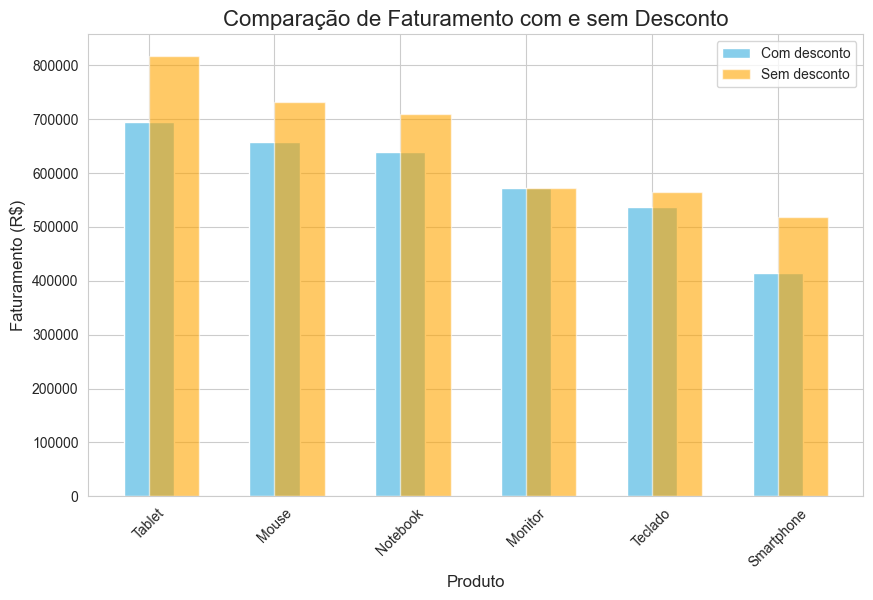

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar o estilo
sns.set_style("whitegrid")

# Criar o gráfico de barras lado a lado
plt.figure(figsize=(10,6))
bar_width = 0.4
produtos = produtos_faturamento['produto']

# Barras com desconto
plt.bar(produtos, produtos_faturamento['valor_total'], width=bar_width, label='Com desconto', color='skyblue')

# Barras sem desconto, deslocadas para não sobrepor
plt.bar(produtos, produtos_faturamento['faturamento_sem_desconto'], width=bar_width, label='Sem desconto', color='orange', alpha=0.6, align='edge')

# Títulos e labels
plt.title('Comparação de Faturamento com e sem Desconto', fontsize=16)
plt.xlabel('Produto', fontsize=12)
plt.ylabel('Faturamento (R$)', fontsize=12)
plt.xticks(rotation=45)
plt.legend()

plt.show()


# alpha=0.7

# O que faz: Controla a transparência da barra.

# Valores vão de 0 a 1:

# 0 → totalmente transparente (invisível)

# 1 → totalmente opaco (sem transparência)

# No seu caso: alpha=0.7 deixa as barras laranja semi-transparentes, permitindo que, se houver sobreposição com as barras azuis, você consiga enxergar ambas.

# 2️⃣ align='edge'

# O que faz: Define como as barras são alinhadas em relação às posições do eixo x.

# Opções comuns:

# 'center' → barra centralizada na posição do x (padrão)

# 'edge' → barra alinhada pelo lado esquerdo da posição do x


In [96]:
display(tabela)

,id_venda,data_venda,produto,categoria,quantidade,preco_unitario,desconto_%,regiao,canal_venda,vendedor,valor_total,ano_mes
0,1,2024-01-01,Monitor,Eletrônicos,2,3547.05,0,Centro-Oeste,Online,Daniela,7094.10,24-01
1,2,2024-01-02,Teclado,Eletrônicos,2,6436.66,10,Sul,Loja Física,Eduardo,11585.99,24-01
2,3,2024-01-03,Tablet,Acessórios,7,7825.42,10,Nordeste,Loja Física,Fernanda,49300.15,24-01
3,4,2024-01-04,Teclado,Eletrônicos,6,4492.44,20,Norte,Online,Eduardo,21563.71,24-01
4,5,2024-01-05,Teclado,Acessórios,3,2649.22,15,Sul,Loja Física,Carlos,6755.51,24-01
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,2024-07-14,Tablet,Eletrônicos,1,159.52,0,Sudeste,Online,Bruno,159.52,24-07
196,197,2024-07-15,Smartphone,Acessórios,9,1880.13,10,Sul,Loja Física,Fernanda,15229.05,24-07
197,198,2024-07-16,Monitor,Acessórios,8,2986.32,10,Centro-Oeste,Loja Física,Daniela,21501.50,24-07
198,199,2024-07-17,Tablet,Informática,1,3953.70,15,Centro-Oeste,Online,Fernanda,3360.64,24-07


In [97]:
faturamento_regional = tabela.groupby('regiao')['valor_total'].sum().reset_index()
faturamento_regional['porcentual'] = faturamento_regional['valor_total'] / (tabela['valor_total'].sum()) * 100
faturamento_regional = faturamento_regional.sort_values( by = 'porcentual', ascending= False)
faturamento_regional['porcentual'] = faturamento_regional['porcentual'].map('{:.2f}%'.format)

display(faturamento_regional)

,regiao,valor_total,porcentual
3,Sudeste,843038.44,24.00%
0,Centro-Oeste,734194.41,20.90%
2,Norte,710529.71,20.23%
4,Sul,668988.37,19.05%
1,Nordeste,555884.43,15.83%


In [98]:
faturamento_regional1 = tabela.groupby('regiao')['quantidade'].sum().reset_index()
faturamento_regional1['porcentual'] = faturamento_regional1['quantidade'] / (tabela['quantidade'].sum()) * 100
faturamento_regional1 = faturamento_regional1.sort_values( by = 'porcentual', ascending= False)
faturamento_regional1['porcentual'] = faturamento_regional1['porcentual'].map('{:.2f}%'.format)

display(faturamento_regional1)

,regiao,quantidade,porcentual
3,Sudeste,214,22.06%
4,Sul,209,21.55%
0,Centro-Oeste,203,20.93%
2,Norte,201,20.72%
1,Nordeste,143,14.74%


In [99]:
vendas_por_canal = tabela.groupby('canal_venda')['valor_total'].sum().reset_index()
vendas_por_canal['porcentual'] = vendas_por_canal[ 'valor_total'] / (tabela['valor_total'].sum()) * 100
vendas_por_canal= vendas_por_canal.sort_values(by = 'porcentual', ascending = False)
vendas_por_canal['porcentual'] = vendas_por_canal['porcentual'].map('{:.2f}%'.format)
display(vendas_por_canal)


,canal_venda,valor_total,porcentual
1,Online,1964853.77,55.94%
0,Loja Física,1547781.59,44.06%


In [100]:
import pandas as pd

# 1) pivot com soma do faturamento por produto x canal
pivot_valor = pd.pivot_table(
    tabela,
    index='produto',
    columns='canal_venda',
    values='valor_total',
    aggfunc='sum',
    fill_value=0  # preenche com zero onde não houver vendas
)

# 2) total por produto (soma das colunas para cada linha)
pivot_valor['Total'] = pivot_valor.sum(axis=1)

# 3) calcular percentuais por produto (cada canal / total do produto * 100)
pivot_percent = pivot_valor.div(pivot_valor['Total'], axis=0) * 100

# 4) formatar resultados (opcional)
#    - formata valores monetários (ex.: R$ 693983.08) — aqui uso separador padrão
pivot_valor_format = pivot_valor.applymap(lambda x: f'R${x:,.2f}')

#    - formata percentuais (ex.: 42.40%)
pivot_percent_format = pivot_percent.applymap(lambda x: f'{x:.2f}%')

# 5) juntar lado a lado valor e percentual com MultiIndex nas colunas
tabela_combinada = pd.concat([pivot_valor_format, pivot_percent_format], 
                             axis=1, keys=['valor', 'percentual'])

# Opcional: reordenar colunas para ficar (valor canal, percentual canal, ...) ou outra ordem
# Aqui deixo como está (cada bloco 'valor' e 'percentual' por completo).
display(tabela_combinada)



C:\Users\amand\AppData\Local\Temp\ipykernel_16784\4002601513.py:21: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_valor_format = pivot_valor.applymap(lambda x: f'R${x:,.2f}')
C:\Users\amand\AppData\Local\Temp\ipykernel_16784\4002601513.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_percent_format = pivot_percent.applymap(lambda x: f'{x:.2f}%')


valor                              percentual          \
canal_venda   Loja Física        Online         Total Loja Física  Online   
produto                                                                     
Monitor      R$230,390.59  R$341,292.85  R$571,683.44      40.30%  59.70%   
Mouse        R$317,268.51  R$340,805.99  R$658,074.50      48.21%  51.79%   
Notebook     R$344,490.33  R$294,159.33  R$638,649.66      53.94%  46.06%   
Smartphone   R$105,591.87  R$308,447.34  R$414,039.21      25.50%  74.50%   
Tablet       R$356,231.47  R$337,751.61  R$693,983.08      51.33%  48.67%   
Teclado      R$193,808.82  R$342,396.65  R$536,205.47      36.14%  63.86%   

                      
canal_venda    Total  
produto               
Monitor      100.00%  
Mouse        100.00%  
Notebook     100.00%  
Smartphone   100.00%  
Tablet       100.00%  
Teclado      100.00%

In [101]:
# Agrupar por produto e canal
vendas_por_produto_canal = tabela.groupby(['produto', 'canal_venda'])['valor_total'].sum().reset_index()

# Calcular o total de vendas por produto
total_por_produto = vendas_por_produto_canal.groupby('produto')['valor_total'].transform('sum')

# Calcular o percentual de cada canal dentro de cada produto
vendas_por_produto_canal['porcentual'] = (vendas_por_produto_canal['valor_total'] / total_por_produto) * 100

# Formatar o percentual para duas casas decimais
vendas_por_produto_canal['porcentual'] = vendas_por_produto_canal['porcentual'].map('{:.2f}%'.format)

# Exibir resultado final
display(vendas_por_produto_canal)


,produto,canal_venda,valor_total,porcentual
0,Monitor,Loja Física,230390.59,40.30%
1,Monitor,Online,341292.85,59.70%
2,Mouse,Loja Física,317268.51,48.21%
3,Mouse,Online,340805.99,51.79%
4,Notebook,Loja Física,344490.33,53.94%
5,Notebook,Online,294159.33,46.06%
6,Smartphone,Loja Física,105591.87,25.50%
7,Smartphone,Online,308447.34,74.50%
8,Tablet,Loja Física,356231.47,51.33%
9,Tablet,Online,337751.61,48.67%


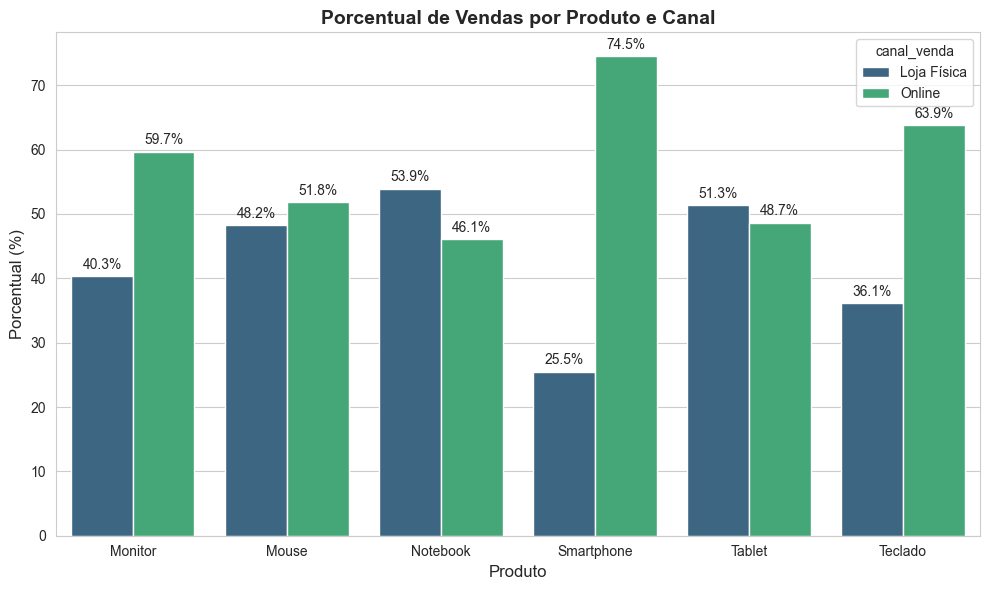

In [102]:
# Converter 'percentual' para número (caso ainda esteja como texto com %)
vendas_por_produto_canal['porcentual'] = vendas_por_produto_canal['porcentual'].replace('%', '', regex=True).astype(float)
# Criar o gráfico de barras agrupadas
plt.figure(figsize=(10, 6))
sns.barplot(
    data=vendas_por_produto_canal,
    x='produto',
    y='porcentual',
    hue='canal_venda',
    palette='viridis'
)
# Títulos e rótulos
plt.title('Porcentual de Vendas por Produto e Canal', fontsize=14, fontweight='bold')
plt.xlabel('Produto', fontsize=12)
plt.ylabel('Porcentual (%)', fontsize=12)


# Mostrar rótulos acima das barras
for container in plt.gca().containers:
     plt.bar_label(container, fmt='%.1f%%', padding=3)

# Ajustar layout
plt.tight_layout()
plt.show()

In [103]:
display(tabela)

,id_venda,data_venda,produto,categoria,quantidade,preco_unitario,desconto_%,regiao,canal_venda,vendedor,valor_total,ano_mes
0,1,2024-01-01,Monitor,Eletrônicos,2,3547.05,0,Centro-Oeste,Online,Daniela,7094.10,24-01
1,2,2024-01-02,Teclado,Eletrônicos,2,6436.66,10,Sul,Loja Física,Eduardo,11585.99,24-01
2,3,2024-01-03,Tablet,Acessórios,7,7825.42,10,Nordeste,Loja Física,Fernanda,49300.15,24-01
3,4,2024-01-04,Teclado,Eletrônicos,6,4492.44,20,Norte,Online,Eduardo,21563.71,24-01
4,5,2024-01-05,Teclado,Acessórios,3,2649.22,15,Sul,Loja Física,Carlos,6755.51,24-01
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,2024-07-14,Tablet,Eletrônicos,1,159.52,0,Sudeste,Online,Bruno,159.52,24-07
196,197,2024-07-15,Smartphone,Acessórios,9,1880.13,10,Sul,Loja Física,Fernanda,15229.05,24-07
197,198,2024-07-16,Monitor,Acessórios,8,2986.32,10,Centro-Oeste,Loja Física,Daniela,21501.50,24-07
198,199,2024-07-17,Tablet,Informática,1,3953.70,15,Centro-Oeste,Online,Fernanda,3360.64,24-07


In [104]:
performance = tabela.groupby('vendedor')['valor_total'].sum().reset_index()

total_geral = performance['valor_total'].sum()

performance['porcentual'] = (performance['valor_total'] / total_geral) * 100
performance = performance.sort_values(by = 'porcentual', ascending=False)
performance['porcentual'] = performance['porcentual'].map('{:.2f}%'.format)
display(performance)

,vendedor,valor_total,porcentual
1,Bruno,758511.54,21.59%
2,Carlos,738627.63,21.03%
4,Eduardo,578482.91,16.47%
3,Daniela,555241.22,15.81%
0,Ana,447845.48,12.75%
5,Fernanda,433926.58,12.35%
